In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip3 install ipython-autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.0 MB/s 


In [3]:
%load_ext autotime
import pandas as pd
import numpy as np
# import pickle5 as pickle
import re
from tqdm.notebook import tqdm
tqdm.pandas()

import re
def tag_cleaner(row):
  row = re.sub('@','',row)
  row = re.sub('\++','+',row)
  row = re.sub('-+','-',row)
  row = re.sub('/',' ',row)
  row = re.sub('%','',row)
  row = re.sub('[a-z]','',row)
  return row

import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

time: 2.62 s (started: 2022-12-22 14:18:48 +00:00)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Get Data

In [4]:
my_dir = '/content/drive/MyDrive/Discord-Reddit/'

time: 1.2 ms (started: 2022-12-22 14:18:51 +00:00)


In [5]:
community_names = ['Overwatch','europe','Jokes','nosleep','Rainbow6','history','Ukrainian','ksi','sports',
 'dankmemes','Games','kpop','music','rickandmorty','Writingprompts']
# community_names = ['Ukrainian']
community_names = ['europe','Jokes','nosleep','Rainbow6','history','Ukrainian','ksi','sports',
 'dankmemes','Games','kpop','music','rickandmorty','Writingprompts']
data_all = pd.DataFrame()
for community_name in tqdm(community_names):
  merged_data = pd.read_excel(my_dir+f'Datasets/Clustered_Data/{community_name}_clustered.xlsx')
  merged_data['community'] = community_name
  data_all = pd.concat([data_all,merged_data],ignore_index=True)
  print(f'{community_name} added:')

  0%|          | 0/14 [00:00<?, ?it/s]

europe added:
Jokes added:
nosleep added:
Rainbow6 added:
history added:
Ukrainian added:
ksi added:
sports added:
dankmemes added:
Games added:
kpop added:
music added:
rickandmorty added:
Writingprompts added:
time: 58.3 s (started: 2022-12-22 14:18:51 +00:00)


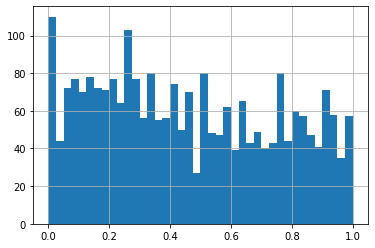

time: 245 ms (started: 2022-12-02 16:54:44 +00:00)


In [ ]:
data_all.groupby(['community','cluster'],as_index=False)['proportion_of_reddit'].mean()['proportion_of_reddit'].hist(bins=40)

# Find Tags

In [6]:
from collections import Counter

usas_tags=pd.read_csv('https://ucrel.lancs.ac.uk/usas/semtags_subcategories.txt',sep='\t', header=None, encoding='cp1252').rename({0:'tag', 1:'description'}, axis=1)
# usas_tags['description']=usas_tags.description.apply(lambda x: x.strip())
# usas_tags['nums']=0
# base_tags_counter = Counter(dict((zip(usas_tags.tag, usas_tags.nums))))
usas_tags = dict(zip(usas_tags.description.str.strip(), usas_tags.tag))
usas_tags

{'General And Abstract Terms': 'A1',
 'General actions / making': 'A1.1.1',
 'Inaction': 'A1.1.1-',
 'Damaging and destroying': 'A1.1.2',
 'Fixing and mending': 'A1.1.2-',
 'Suitability': 'A1.2',
 'Suitable': 'A1.2+',
 'Unsuitable': 'A1.2-',
 'Caution': 'A1.3',
 'Cautious': 'A1.3+',
 'No caution': 'A1.3-',
 'Chance, luck': 'A1.4',
 'Lucky': 'A1.4+',
 'Unlucky': 'A1.4-',
 'Use': 'A1.5',
 'Using': 'A1.5.1',
 'Used': 'A1.5.1+',
 'Unused': 'A1.5.1-',
 'Usefulness': 'A1.5.2',
 'Useful': 'A1.5.2+',
 'Useless': 'A1.5.2-',
 'Concrete/Abstract': 'A1.6',
 'Constraint': 'A1.7+',
 'No constraint': 'A1.7-',
 'Inclusion': 'A1.8+',
 'Exclusion': 'A1.8-',
 'Avoiding': 'A1.9',
 'Unavoidable': 'A1.9-',
 'Affect': 'A2',
 'Modify, change': 'A2.1',
 'Change': 'A2.1+',
 'No change': 'A2.1-',
 'Cause&Effect/Connection': 'A2.2',
 'Cause/Effect/Connected': 'A2.2+',
 'Unconnected': 'A2.2-',
 'Being': 'A3',
 'Existing': 'A3+',
 'Non-existing': 'A3-',
 'Classification': 'A4',
 'Generally kinds, groups, examples':

time: 538 ms (started: 2022-12-22 14:20:06 +00:00)


In [7]:
all_tags_diff=pd.read_excel('/content/drive/MyDrive/Discord-Reddit/Datasets/Tags_differences/all_tags_diff.xlsx').set_index('tag')

time: 471 ms (started: 2022-12-22 14:20:12 +00:00)


In [8]:
tag_description = 'Usefulness'
tag_x = usas_tags[tag_description]
print('{}\nmean = {}\nerror = {}'.format(tag_description,all_tags_diff['mean'][tag_description],all_tags_diff['mean'][tag_description]-all_tags_diff['LB'][tag_description]))

Usefulness
mean = 0.1291637755672583
error = 0.05755969859203633
time: 6.68 ms (started: 2022-12-22 14:20:17 +00:00)


In [ ]:
tag_x

'A1.5.2'

time: 23.7 ms (started: 2022-12-21 15:12:14 +00:00)


In [10]:
filtered_data = data_all[data_all['USAS_Tags'].str.contains(tag_x)]
# filtered_data = filtered_data[filtered_data['proportion_of_reddit']>=0.8]
filtered_data = filtered_data[filtered_data['platform']=='reddit']

time: 598 ms (started: 2022-12-22 14:20:31 +00:00)


time: 4.04 ms (started: 2022-12-02 16:07:13 +00:00)


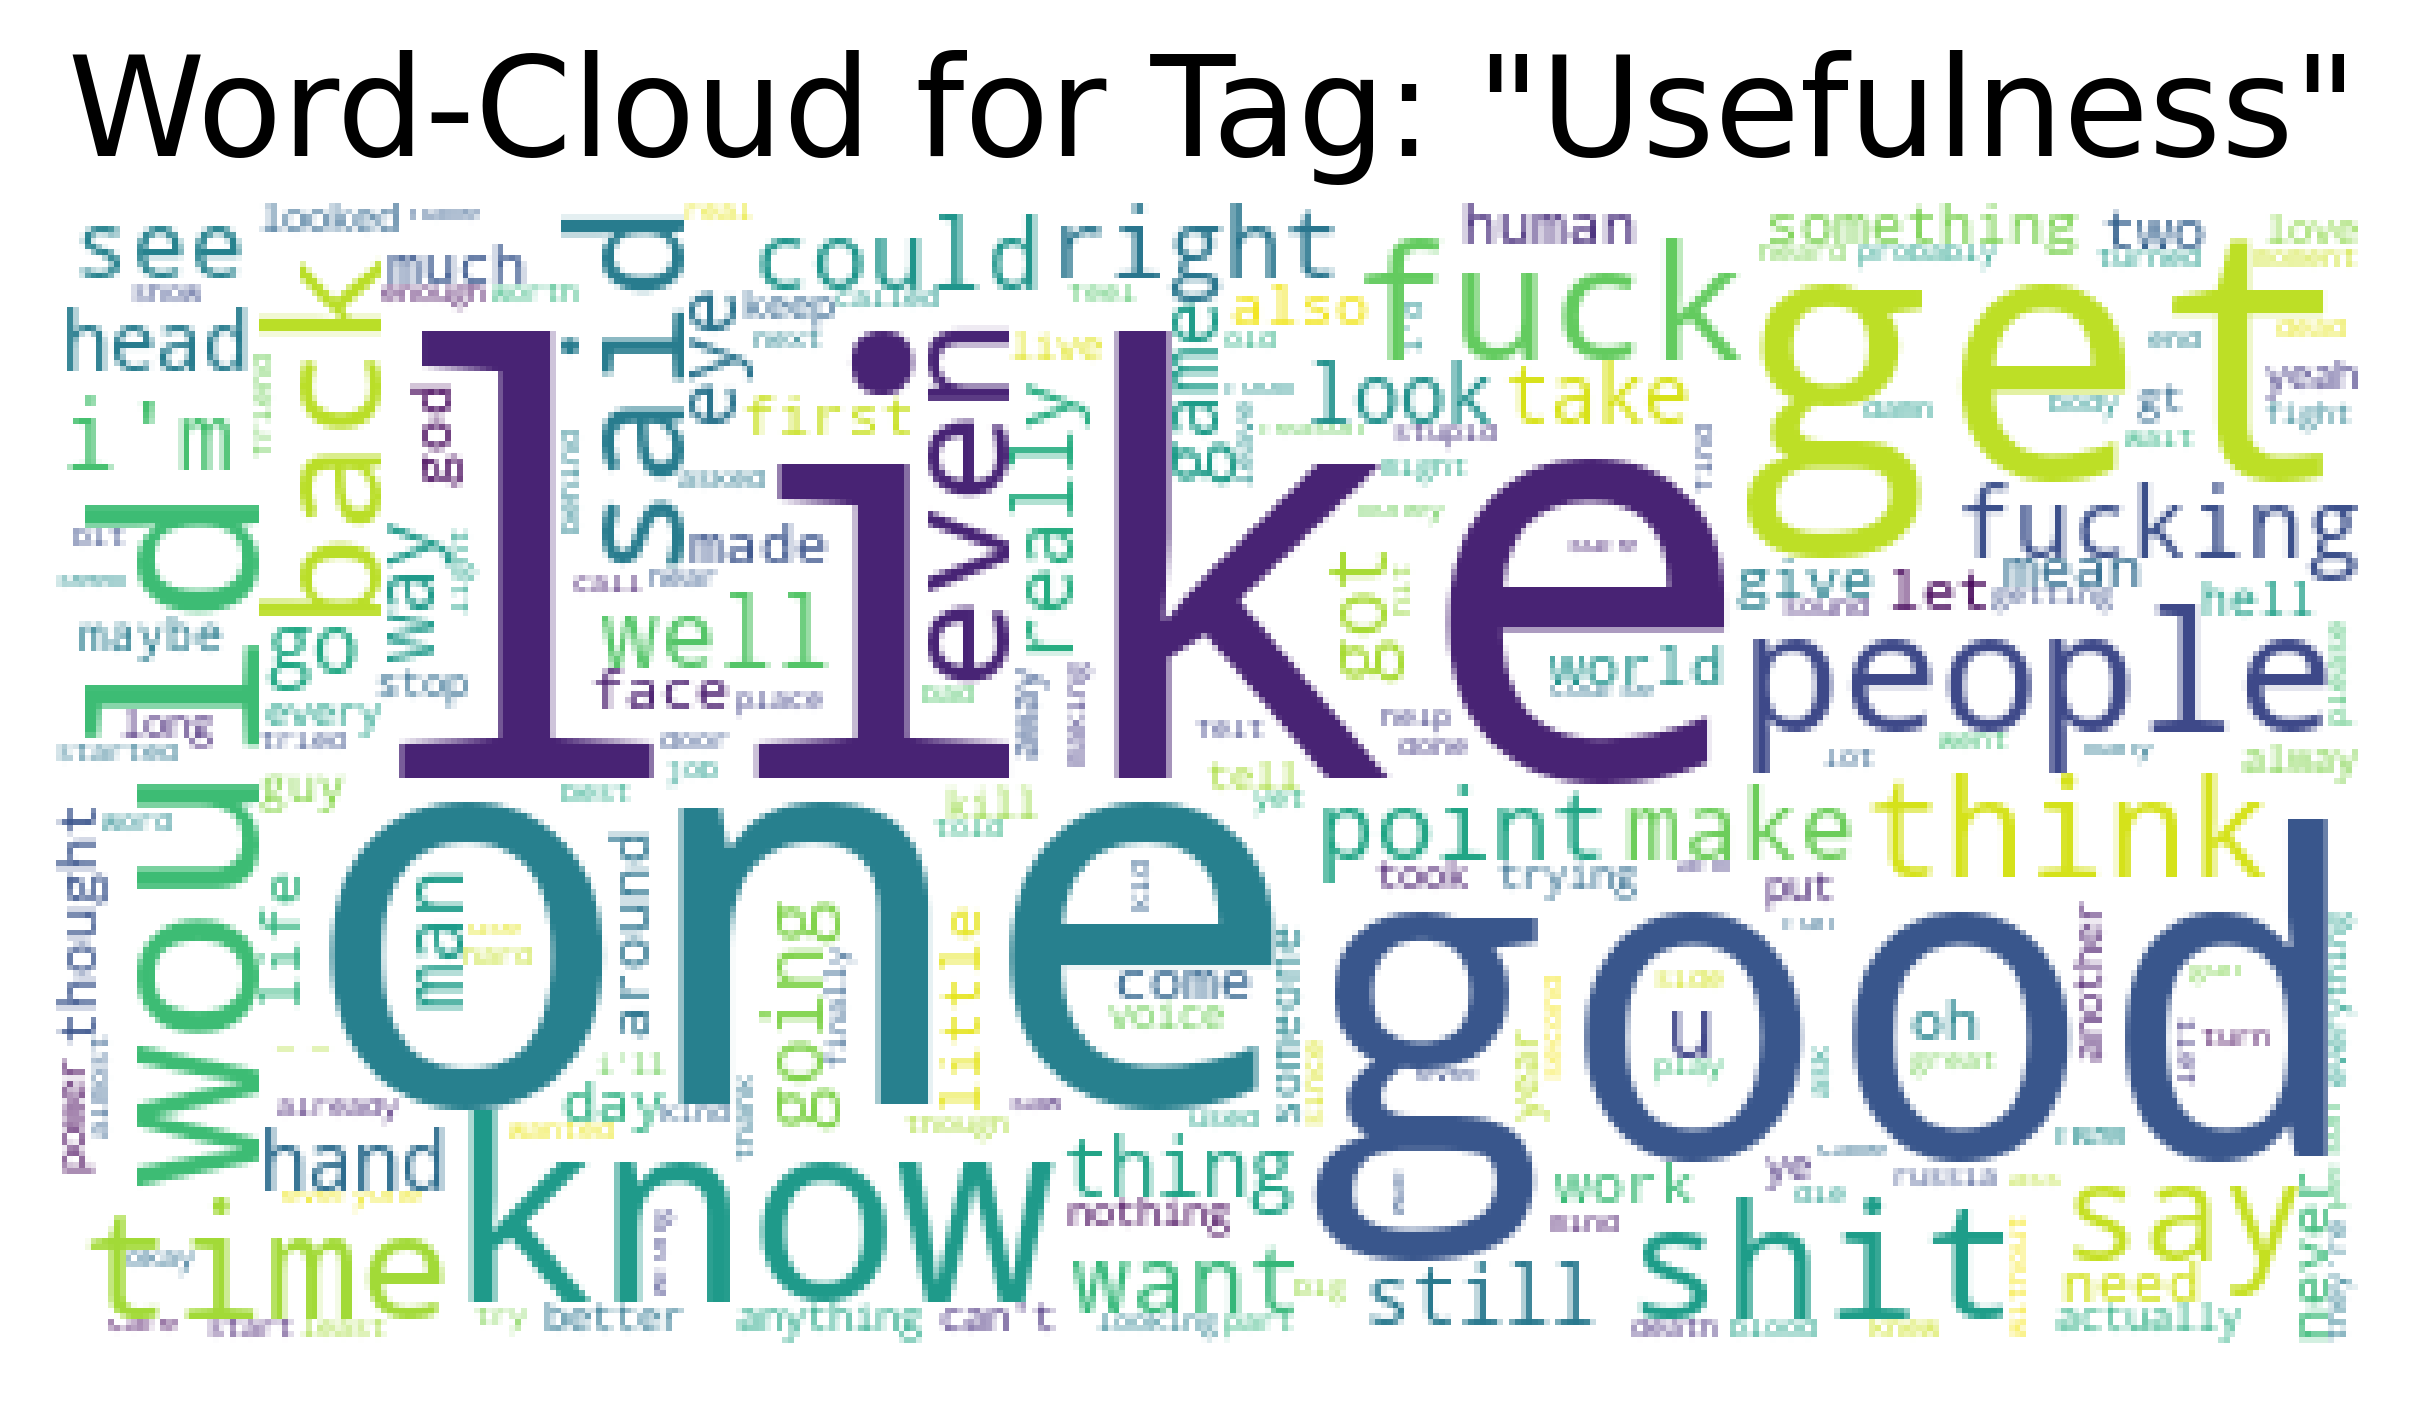

time: 5.53 s (started: 2022-12-22 14:20:37 +00:00)


In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import imageio

all_text = " ".join(text_i for text_i in filtered_data['content'])

my_wordcloud = WordCloud(background_color="white",random_state=1,stopwords=stop_words)
my_wordcloud = my_wordcloud.generate(all_text) #.generate_from_frequencies(reddit_tags)


plt.figure(dpi=500)
plt.title(f'Word-Cloud for Tag: "{tag_description}"',fontsize=20)
plt.imshow(my_wordcloud)
plt.axis("off")
# plt.savefig('/content/drive/MyDrive/Kialo/toxic_wordcloud.png', format="png", dpi=300)
plt.show()

In [12]:
filtered_data=filtered_data[filtered_data['proportion_of_reddit']>=0.9].sample(50,random_state=1)
filtered_data

,Unnamed: 0,content,platform,cluster,cluster_label,proportion_of_reddit,USAS_Tags,community
118055,18186.0,are you just pretending to be this dense or is...,reddit,180.0,said_shit_dick_people,0.901639,A3+ Z5 Z8mf A14 T3--- T1.3- N3.3--- A5.4- Z5 A...,Games
98580,153927.0,cops are just good as good against people who ...,reddit,218.0,want_cops_police,0.916667,G2.1/S2mf A5.1+@ A3+ Z5 A14 T3--- T1.3- N3.3--...,dankmemes
187461,114754.0,"""leave it by the door."" sheldon commanded lazi...",reddit,136.0,said_eyes_time_man,0.987342,PUNCT A5.4+ A5.4+ Z5 Z5 H2 H1@ PUNCT PUNCT Z99...,Writingprompts
115161,490431.0,even bad people can do good deeds. epic is sti...,reddit,178.0,fucked_game_steam,0.939394,A13.1 A5.1- G2.2- O4.2- B2- S2mfc A7+ A1.1.1 G...,Games
32493,340424.0,y’all a bunch of damn crybabies citing the «ga...,reddit,277.0,feels_game_shit,0.921569,Z8mf N5.1+ Z5 N5+ S5+c Z5 Z4 Z99 Q2.2 G2.1 Z5 ...,Rainbow6
192056,13135.0,making the prophecy public knowledge had been ...,reddit,147.0,said_sword_king,0.929412,A1.1.1 A9+ A2.2 S6+ A3+ A9- X9.2+ X6+ Z5 Q2.2/...,Writingprompts
192506,8963.0,"god damn, i wasn't expecting a story like this...",reddit,126.0,love_story_writing,0.977778,Z1mf Z3c Z1mf Z3c PUNCT Z8mf A3+ Z5 Z6 X2.6+ B...,Writingprompts
176432,20177.0,your analogy is bad and you're dumb for thinki...,reddit,177.0,circumcised_foreskin_people,1.000000,Z8 A6.1+ A3+ Z5 A5.1- G2.2- O4.2- B2- Z5 Z8mf ...,rickandmorty
117350,319075.0,"what a stupid greedy decision from fifa, the n...",reddit,191.0,&_game_ea_fifa,0.903846,Z8 Z5 Z5 S1.2.6- X9.1- S1.2.2+ X6+ Z5 Z99 PUNC...,Games
192504,122772.0,“stop *crying*” she spat. it wasn’t his fault....,reddit,136.0,said_eyes_time_man,0.987342,PUNCT T2- S8- M8 H4 A1.1.1@ Z5 E4.1- Q2.2 Z5 P...,Writingprompts


time: 143 ms (started: 2022-12-22 14:20:49 +00:00)


In [18]:
filtered_data['content'][14651]

"what? the ancient istory? alexander the great? only nationalist idiots believe that alexander the great isn't greek, and i'm saying this as a macedonian. no one in their right mind gives a flying fuck about that genocidal maniac. good for tourism, though... my point is, you opened the flood gates and now you don't like the consequences. i support your remark about erdogan and his unrealistic demands, but nato made this possible, and erdogan is using this to his advantage."

time: 11.7 ms (started: 2022-12-22 14:47:14 +00:00)


In [ ]:
filtered_data['cluster'].value_counts()

6.0      37
155.0    36
207.0    34
148.0    21
150.0    15
         ..
7.0       1
39.0      1
117.0     1
88.0      1
111.0     1
Name: cluster, Length: 84, dtype: int64

time: 7.16 ms (started: 2022-12-02 16:00:09 +00:00)


In [ ]:
filtered_data[filtered_data['cluster']==150]

,Unnamed: 0,content,platform,cluster,cluster_label,proportion_of_reddit,USAS_Tags,community
1977,136708.0,lil whiney bitch,discord,150.0,bitch_bitch_whiney,0.1,Z99 Z99 A5.1-/S2.1f L2f Q2.2/E2- A12-,europe
2862,93574.0,"i dont care, youre still a bitch",discord,150.0,bitch_bitch_whiney,0.1,Z8mf A1.1.1 G2.2- X9.2+ E3- N5+ G2.1% Z5 Z6 E6...,europe
4073,138626.0,this lil bitch,discord,150.0,bitch_bitch_whiney,0.1,M6 Z5 Z8 Z99 A5.1-/S2.1f L2f Q2.2/E2- A12-,europe
4388,105164.0,this bad bitch right here,discord,150.0,bitch_bitch_whiney,0.1,M6 Z5 Z8 A5.1- G2.2- O4.2- B2- A5.1-/S2.1f L2f...,europe
4860,26062.0,u are a basic bitch,discord,150.0,bitch_bitch_whiney,0.1,Z8mf A3+ Z5 Z5 A6.2+ A11.1+ A12+ A5.1-/S2.1f L...,europe
4924,17823.0,you little bitch,discord,150.0,bitch_bitch_whiney,0.1,Z8mf N3.2- T3- N3.7- N3.3- T1.3- A11.1- A5.1-/...,europe
5362,107470.0,epitomizes what it means to be bitch made,discord,150.0,bitch_bitch_whiney,0.1,A5.4+ A5.4+ Z8 Q1.1 X7+ Z5 A3+ Z5 A5.1-/S2.1f ...,europe
5370,164486.0,you said bitch so i assumed,discord,150.0,bitch_bitch_whiney,0.1,Z8mf Q2.1 A5.1-/S2.1f L2f Q2.2/E2- A12- Z5 A13...,europe
7085,130947.0,do i need to make u my bitch too,discord,150.0,bitch_bitch_whiney,0.1,A1.1.1 G2.2- X9.2+ E3- N5+ G2.1% Z5 Z8mf S6+ Z...,europe
7090,135084.0,bitch*,discord,150.0,bitch_bitch_whiney,0.1,A5.1-/S2.1f L2f Q2.2/E2- A12- Z5,europe


time: 22.4 ms (started: 2022-12-02 16:03:25 +00:00)
